# Evaluate Lesson Exercises

Do you work for this exercise in either a jupyter notebook named `evaluate` within your regression-exercises repository. By the end of this exercise you will also create a python script named `evaluate`, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name `evaluate` within your regression-exercises repo.

In [1]:
# References:
# https://github.com/CodeupClassroom/darden-regression-exercises/blob/master/eval.ipynb

In [44]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

import math
from sklearn.metrics import mean_squared_error
from math import sqrt


from statsmodels.formula.api import ols

In [ ]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")
df.to_csv('lemonade.csv', index = False)

In [3]:
df = pd.read_csv('lemonade.csv')
df

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18
...,...,...,...,...
360,42.7,1.00,33,19
361,37.8,1.25,32,16
362,39.5,1.25,17,15
363,30.9,1.43,22,13


In [4]:
# Settling significance level and alpha:

significance_level = .95
alpha = round(1-significance_level, 2)

In [5]:
# Creating a baseline (using the mean) for the sales column

df.sales.mean()

25.323287671232876

## Building a super simple model (SSM™)

In [6]:
# building the super-simple linear model (step 1):

model = ols('sales ~ flyers', data = df).fit()
# predictions = model.predict(df.x)

In [7]:
model

In [8]:
# Now that I've fit the model (which usually would be to my train data, I'll create the dataframe that contains the x and y parameters and eventually the predictions)

evaluate = pd.DataFrame()

evaluate['x'] = df.flyers

In [45]:
# y variable is sales, and the baseline is the mean of sales.
evaluate["y"] = df.sales
evaluate["baseline"] = df.sales.mean()

# y-hat is a common shorthand for "predicted y" values in statistics
evaluate['yhat'] = model.predict()

# Calc the baseline residuals (errors)
evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

# Calc the model's residuals:
evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,15,10,25.323288,-1.599602,15.323288,-11.599602
1,15,13,25.323288,13.773142,12.323288,0.773142
2,27,15,25.323288,13.773142,10.323288,-1.226858
3,28,17,25.323288,20.197573,8.323288,3.197573
4,33,18,25.323288,21.344793,7.323288,3.344793


In [10]:
# Calculate if the model beats the baseline
# Square errors for 2 reasons
# 1. Squaring large numbers increases their magnitude (opposite for small)
# 2. Squaring removes negative residuals
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 6083.326244705024


In [11]:
# Calculating SSE
model_sse = (evaluate.model_residual**2).sum()

# Calcuating MSE
mse = mean_squared_error(evaluate.y, evaluate.yhat)

# Calculating RMSE
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


### Model Significance Evaluation with $R^2$

In [12]:
r2 = model.rsquared
print('R-squared =', round(r2, 3))

R-squared = 0.648


In [13]:
# Now to evaluate the p-value:
f_pval = model.f_pvalue

print("p-value for model significance = ", f_pval)

p-value for model significance =  2.193718738113383e-84


In [14]:
f_pval < alpha

True

In [15]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls = ':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($ - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

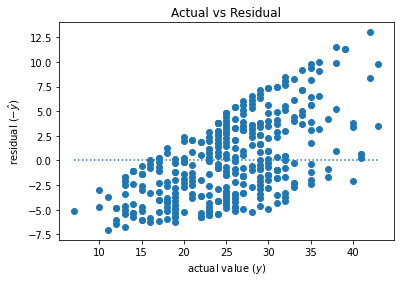

In [16]:
plot_residuals(evaluate.y, evaluate.yhat)
plt.show()

## Drill time! Repetition is key!

In [17]:
# Goal is to take these steps and make a function out of them.
# Use a different feature from my dataset.



In [18]:
def model_function(linear_model, target, feature):
    
    '''
    This function will take in a linear model, a target variable, and a feature. It will calculate if the baseline model or the super simple model is a better fit for the data. If the user's model is a better fit, will run through the SSE, MSE, and RMSE calucations to generate model metrics and check model significance, and return a scatterplot of the model on the dataset.    
    '''
    
    baseline = target.mean()
    model = linear_model
    evaluate = pd.DataFrame()
    evaluate['x'] = feature
    
    # y variable is sales, and the baseline is the mean of sales.
    evaluate["y"] = target
    evaluate["baseline"] = target.mean()

    # y-hat is a common shorthand for "predicted y" values in statistics
    evaluate['yhat'] = model.predict()

    # Calc the baseline residuals (errors)
    evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

    # Calc the model's residuals:
    evaluate["model_residual"] = evaluate.yhat - evaluate.y
    
    # Now the function calculates the SSE, MSE, and RMSE:
    # Calculate if the model beats the baseline
    # Square errors for 2 reasons:
        # 1. Squaring large numbers increases their magnitude (opposite for small)
        # 2. Squaring removes negative residuals
        
    baseline_sse = (evaluate.baseline_residual**2).sum()
    model_sse = (evaluate.model_residual**2).sum()

    if model_sse > baseline_sse:
        print("Our baseline is better than the model")
    
    else:
        print("Our model beats the baseline")
        
        metrics = pd.DataFrame()
        
        # Calculating SSE
        model_sse = (evaluate.model_residual**2).sum()

        # Calcuating MSE
        mse = mean_squared_error(evaluate.y, evaluate.yhat)

        # Calculating RMSE
        rmse = sqrt(mse)

        print("SSE is", model_sse, " which is the sum sf squared errors")
        print("MSE is", mse, " which is the average squared error")
        print("RMSE is", rmse, " which is the square root of the MSE")
        
        # Evaluate the model significance using r-squared.
        r2 = model.rsquared
        print('R-squared =', round(r2, 3))
        
        
        # Now to evaluate the p-value:
        f_pval = model.f_pvalue
        print("p-value for model significance = ", f_pval)
        
        
        # Nested function to generate plot:
        def plot_residuals(actual, predicted):
            residuals = actual - predicted
            plt.hlines(0, actual.min(), actual.max(), ls = ':')
            plt.scatter(actual, residuals)
            plt.ylabel('residual ($ - \hat{y}$)')
            plt.xlabel('actual value ($y$)')
            plt.title('Actual vs Residual')
            return plt.gca()
        
        actual = evaluate.y
        predicted = evaluate.yhat
        plot_residuals(evaluate.y, evaluate.yhat)


    
    

In [19]:
# Create and fit the model:

model = ols('sales ~ rainfall', data = df).fit()

Our model beats the baseline
SSE is 2998.2371310300655  which is the sum sf squared errors
MSE is 8.21434830419196  which is the average squared error
RMSE is 2.866068440249109  which is the square root of the MSE
R-squared = 0.827
p-value for model significance =  3.2988846597381e-140


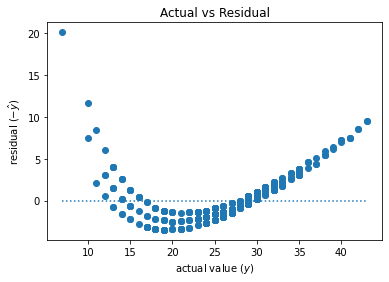

In [20]:
model_function(model, df.sales, df.rainfall)

In [ ]:
model_test = ols('sales ~ rainfall', data = df).fit()

In [ ]:
test1 = 'sales'
test2 = 'rainfall'

In [ ]:
model_test = ols(f'{target_input} ~ {feature_input}', data=df).fit

In [ ]:
target_input = str(input('What is the target variable column? '))
feature_input = str(input('What is the feature column? '))

In [21]:
target_input = str(input('What is the target variable column? '))

What is the target variable column? sales


In [22]:
feature_input = str(input('What is the feature column? '))

What is the feature column? rainfall


In [41]:
df[feature_input]

0      2.00
1      1.33
2      1.33
3      1.05
4      1.00
       ... 
360    1.00
361    1.25
362    1.25
363    1.43
364    2.50
Name: rainfall, Length: 365, dtype: float64

In [27]:
def model_fit_model(df):
    
    target = str(input('What is the target variable column? '))
    feature = str(input('What is the feature column? '))
    
    linear_model = ols(f'{target} ~ {feature}', data=df).fit
    return linear_model

In [28]:
model_fit_model(df)

What is the target variable column? sales
What is the feature column? rainfall


<bound method RegressionModel.fit of <statsmodels.regression.linear_model.OLS object at 0x7ffc812b2e50>>

In [42]:
# Now putting all the functions together:

def fit_linear_model(df):

    target = input('What is the target variable column? ')
    feature = input('What is the feature column? ')

    linear_model = ols(f'{target} ~ {feature}', data=df).fit

    baseline = df[target].mean()                              
    model = linear_model           
    evaluate = pd.DataFrame()
    evaluate["x"] = df[feature]                          

    # Our y is our dependent variable
    evaluate["y"] = df[target]                                
    evaluate["baseline"] = df[target].mean()                  
    # y-hat is shorthand for "predicted y" values
    evaluate["yhat"] = model.predict()
    # Calculate the baseline residuals 
    evaluate["baseline_residual"] = evaluate.baseline - evaluate.y
    # Calculate the model residuals
    evaluate["model_residual"] = evaluate.yhat - evaluate.y

    # Calculate if the model beats the baseline
    baseline_sse = ((evaluate.baseline_residual**2).sum())
    model_sse = ((evaluate.model_residual**2).sum())
    if model_sse > baseline_sse:
        print("Our baseline is better than the model.")
    else:
        metrics = pd.DataFrame()
        # Sum the squares of the baseline errors
        model_sse = ((evaluate.model_residual**2).sum())
        # Take the average of the Sum of squared errors
        # mse = model_sse / len(evaluate)
        # Or we could calculate this using sklearn's mean_squared_error function
        mse = mean_squared_error(evaluate.y, evaluate.yhat)
        # Now we'll take the Square Root of the Sum of Errors
        # Taking the square root is nice because the units of the error 
        # will be in the same units as the target variable.
        rmse = sqrt(mse)
        print("SSE is", model_sse, "which is the sum sf squared errors")
        print("MSE is", mse, "which is the average squared error")
        print("RMSE is", rmse, "which is the square root of the MSE")
        # The model commented below is our model
        # model = ols('sales ~ flyers', df).fit()
        r2 = model.rsquared
        print('R-squared = ', round(r2,3))
        # F-Test for p value
        f_pval = model.f_pvalue
        print("p-value for model significance = ", f_pval)

        def plot_residuals(actual, predicted):
            residuals = actual - predicted
            plt.hlines(0, actual.min(), actual.max(), ls=':')
            plt.scatter(actual, residuals)
            plt.ylabel('residual ($y - \hat{y}$)')
            plt.xlabel('actual value ($y$)')
            plt.title('Actual vs Residual')
            return plt.gca()

        actual = evaluate.y 
        predicted = evaluate.yhat
        plot_residuals(evaluate.y, evaluate.yhat)

In [43]:
fit_linear_model(df)

What is the target variable column? sales
What is the feature column? rainfall


AttributeError: 'function' object has no attribute 'predict'

In [ ]:
def linear_models(linear_model, target, feature):
    
    baseline = target.mean()                              
    model = linear_model           
    evaluate = pd.DataFrame()
    evaluate["x"] = feature                          
    
    # Our y is our dependent variable
    evaluate["y"] = target                                
    evaluate["baseline"] = target.mean()                  
    # y-hat is shorthand for "predicted y" values
    evaluate["yhat"] = model.predict()
    # Calculate the baseline residuals 
    evaluate["baseline_residual"] = evaluate.baseline - evaluate.y
    # Calculate the model residuals
    evaluate["model_residual"] = evaluate.yhat - evaluate.y
    
    # Calculate if the model beats the baseline
    baseline_sse = ((evaluate.baseline_residual**2).sum())
    model_sse = ((evaluate.model_residual**2).sum())
    if model_sse > baseline_sse:
        print("Our baseline is better than the model.")
    else:
        metrics = pd.DataFrame()
        # Sum the squares of the baseline errors
        model_sse = ((evaluate.model_residual**2).sum())
        # Take the average of the Sum of squared errors
        # mse = model_sse / len(evaluate)
        # Or we could calculate this using sklearn's mean_squared_error function
        mse = mean_squared_error(evaluate.y, evaluate.yhat)
        # Now we'll take the Square Root of the Sum of Errors
        # Taking the square root is nice because the units of the error 
        # will be in the same units as the target variable.
        rmse = sqrt(mse)
        print("SSE is", model_sse, "which is the sum sf squared errors")
        print("MSE is", mse, "which is the average squared error")
        print("RMSE is", rmse, "which is the square root of the MSE")
        # The model commented below is our model
        # model = ols('sales ~ flyers', df).fit()
        r2 = model.rsquared
        print('R-squared = ', round(r2,3))
        # F-Test for p value
        f_pval = model.f_pvalue
        print("p-value for model significance = ", f_pval)
        
        def plot_residuals(actual, predicted):
            residuals = actual - predicted
            plt.hlines(0, actual.min(), actual.max(), ls=':')
            plt.scatter(actual, residuals)
            plt.ylabel('residual ($y - \hat{y}$)')
            plt.xlabel('actual value ($y$)')
            plt.title('Actual vs Residual')
            return plt.gca()
        
        actual = evaluate.y 
        predicted = evaluate.yhat
        plot_residuals(evaluate.y, evaluate.yhat)

In [ ]:
linear_models(model, df.sales, df.rainfall)

In [ ]:
# Use log_rainfall column as the feature (independent variable)

df['log_rainfall'] = np.log(df.rainfall)

In [ ]:
# Create and fit the model:

model = ols('sales ~ log_rainfall', data = df).fit()

In [ ]:
linear_models(model, df.sales, df.log_rainfall)

In [ ]:
model_function(model, df.sales, df.log_rainfall)

In [ ]:
model_temp = ols('sales ~ temperature', data = df).fit()

In [ ]:
model_function(model_temp, df.sales, df.temperature)